## Imports

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [21]:
# load dataset
data = pd.read_csv("seattle-weather.csv")


In [22]:
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


## Data Preprocessing

In [23]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [24]:
data["weather"].value_counts()


weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

## Data Visualization

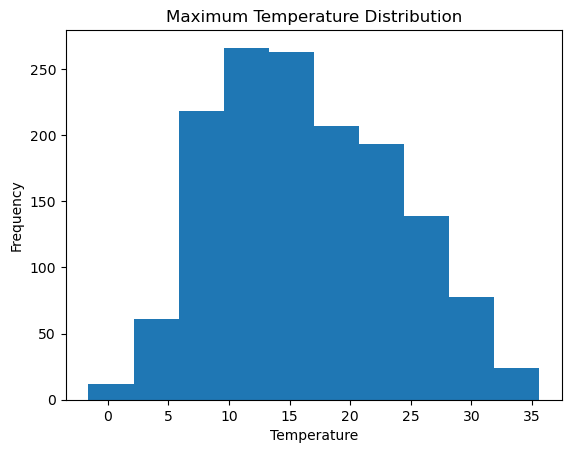

In [25]:
plt.hist(data['temp_max'])
plt.title('Maximum Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

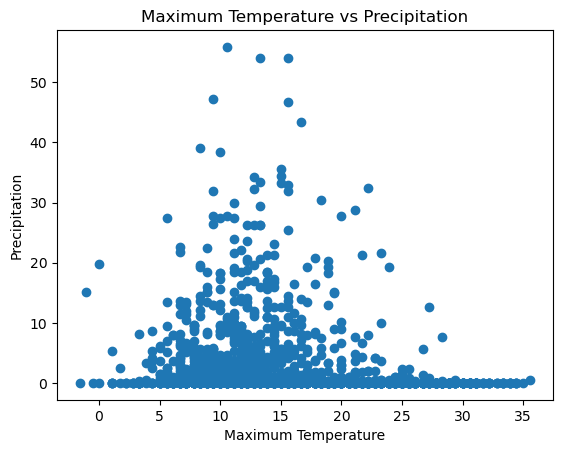

In [26]:
plt.scatter(data['temp_max'], data['precipitation'])
plt.title('Maximum Temperature vs Precipitation')
plt.xlabel('Maximum Temperature')
plt.ylabel('Precipitation')
plt.show()


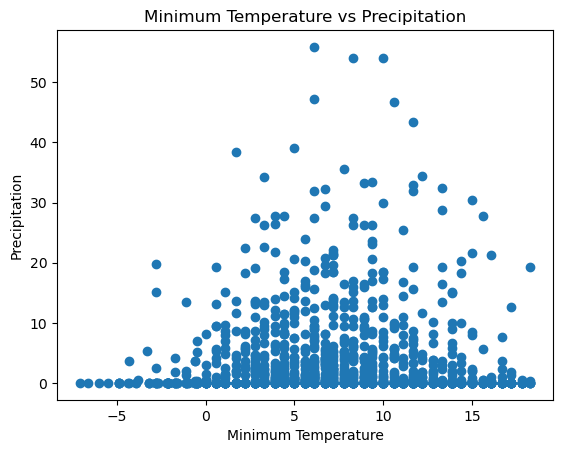

In [27]:
plt.scatter(data['temp_min'], data['precipitation'])
plt.title('Minimum Temperature vs Precipitation')
plt.xlabel('Minimum Temperature')
plt.ylabel('Precipitation')
plt.show()

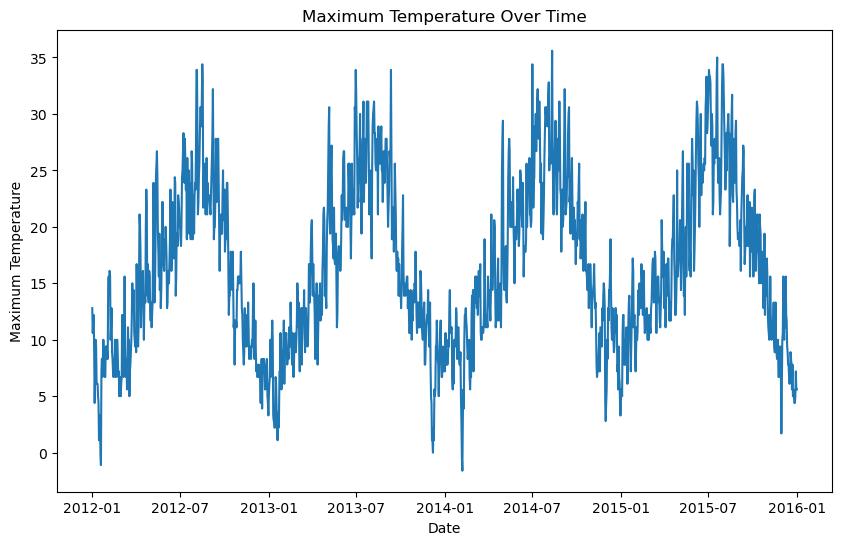

In [28]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_max'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')

plt.show()

## Feature Engineering

In [29]:
# Check the data type of the 'date' column
print(data['date'].dtypes)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract year, month, and day features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

datetime64[ns]


In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int32         
 7   month          1461 non-null   int32         
 8   day            1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), object(1)
memory usage: 85.7+ KB


In [31]:
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2012,1,6
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2012,1,7
7,2012-01-08,0.0,10.0,2.8,2.0,sun,2012,1,8
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2012,1,9
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2012,1,10


In [32]:
le = LabelEncoder()

data['weather_label'] = le.fit_transform(data['weather'])

In [33]:
# Create a dictionary mapping weather labels to weather values
weather_dict = {label: value for label, value in zip(data['weather_label'], data['weather'])}

In [34]:
# Drop the 'weather' column and set 'date' as the index in one line
data = data.drop('weather', axis=1).set_index('date')

data.head()

,precipitation,temp_max,temp_min,wind,year,month,day,weather_label
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,2012,1,1,0
2012-01-02,10.9,10.6,2.8,4.5,2012,1,2,2
2012-01-03,0.8,11.7,7.2,2.3,2012,1,3,2
2012-01-04,20.3,12.2,5.6,4.7,2012,1,4,2
2012-01-05,1.3,8.9,2.8,6.1,2012,1,5,2


## Divide the dataset into features (X) and target variable (y)

In [35]:
# Split the data into features (X) and target variable (y)
x = data.drop(["weather_label"], axis= 1)
y = data["weather_label"]

## Split the data into training and testing sets

In [36]:
x_train, x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.2,random_state=2)


## Model Building

In [37]:
model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

## Train the Model

In [38]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

## Prediction

In [39]:
predictions = model.predict(x_test)


## Evaluation

In [40]:
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.0


In [41]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [42]:
# Assuming y_train, pred_train, y_test, and pred_test are defined correctly
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

print('Accuracy Score on Train Data : {:.2f}%'.format(train_accuracy * 100))
print('Accuracy Score on Test Data : {:.2f}%'.format(test_accuracy * 100))

Accuracy Score on Train Data : 86.13%
Accuracy Score on Test Data : 88.74%
